In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [52]:
np.random.seed(42)

First we calculate the plug-in estimator

In [53]:
n = 25

In [54]:
X = np.random.standard_t(df=3, size=n)

In [55]:
theta = (np.quantile(X, 0.75) - np.quantile(X, 0.25))/1.34

In [56]:
print('Plug-in estimator for theta: {:.4f}'.format(theta))

Plug-in estimator for theta: 1.3957


Now we'll bootstrap and compute confidence intervals.

In [57]:
B = int(1e5)

In [58]:
T_boot = np.empty(B)

In [59]:
for i in range(B):
    X_star = np.random.choice(X, size=n, replace=True)
    T_boot[i] = (np.quantile(X_star,0.75) - np.quantile(X_star,0.25))/1.34

Text(0.5, 1.0, 'Computed values of plug-in estimator from bootstrapping')

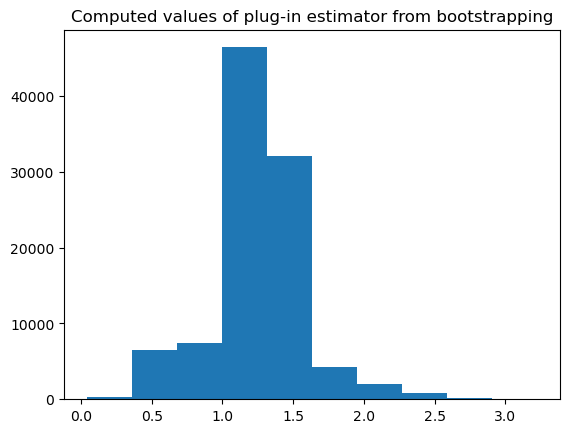

In [60]:
plt.hist(T_boot)
plt.title('Computed values of plug-in estimator from bootstrapping')

In [61]:
se = np.std(T_boot)

In [62]:
alpha = 0.05

In [63]:
z = norm.ppf(1-alpha/2)

In [64]:
quant_low = np.quantile(T_boot, alpha/2)

In [65]:
quant_high = np.quantile(T_boot, 1-alpha/2)

In [66]:
print('Estimated standard error from bootstrapping: {:.4f}'.format(se))
print('Normal interval: ({:.4f}, {:.4f})'.format(theta-z*se, theta+z*se))
print('Percentile interval: ({:.4f}, {:.4f})'.format(quant_low, quant_high))
print('Pivotal interval: ({:.4f}, {:.4f})'.format(2*theta-quant_high, 2*theta-quant_low))

Estimated standard error from bootstrapping: 0.3342
Normal interval: (0.7407, 2.0506)
Percentile interval: (0.5621, 2.1559)
Pivotal interval: (0.6355, 2.2293)


The three confidence intervals nearly equal in this case.